In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import time
import math
import json
import sys
import rasterio
from rasterio.mask import mask
from PIL import Image
from os import listdir
from os.path import isfile, join
import pickle
import h5py
import scipy.misc
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import random
from statistics import mean 

In [11]:
# Confusion matrix code
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('')
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
villageFeaturesCsv = 'data/2014_dec_cutFiles_trial.csv'
labelsFolder ='villageLabels'
trainCols=['light_'+str(i) for i in range(0,129,1)]
onlyfiles = [f for f in listdir(labelsFolder) if (isfile(join(labelsFolder, f)) and f.endswith('.csv')) ]
print(onlyfiles)
predictionColumnDict={
    'VillageLabels_FC.csv':'Village_HHD_Cluster_FC',
    'VillageLabels_EMP.csv':'Village_HHD_Cluster_EMP',
    'VillageLabels_BF.csv':'Village_HHD_Cluster_BF',
    'VillageLabels_CHH.csv':'Village_HHD_Cluster_CHH',
    'VillageLabels_MSW.csv':'Village_HHD_Cluster_MSW',
    'VillageLabels_MSL.csv':'Village_HHD_Cluster_MSL',
}

['VillageLabels_FC.csv', 'VillageLabels_EMP.csv', 'VillageLabels_BF.csv', 'VillageLabels_CHH.csv', 'VillageLabels_MSW.csv', 'VillageLabels_MSL.csv']


VillageLabels_FC.csv
accuracy_score 0.6884057971014492
f1_score 0.6145275710493102


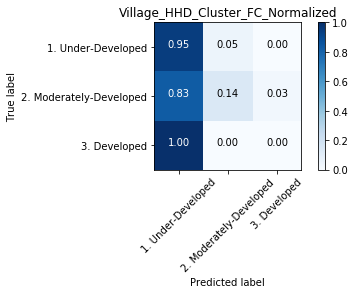

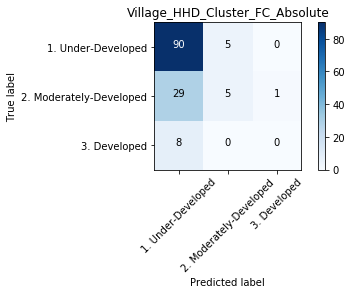

VillageLabels_EMP.csv
accuracy_score 0.5942028985507246
f1_score 0.5817882064258876


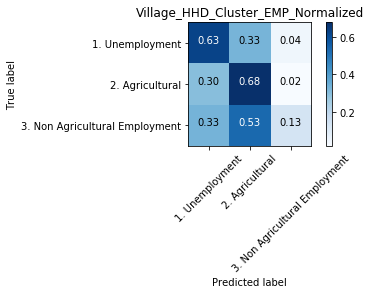

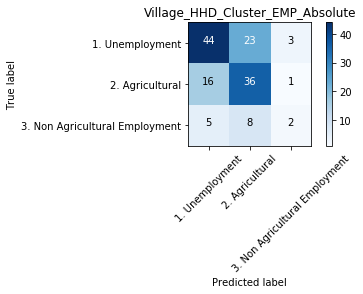

VillageLabels_BF.csv
accuracy_score 0.8333333333333334
f1_score 0.7736521533705153


/home/satbigvm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


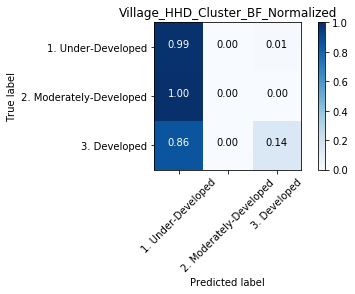

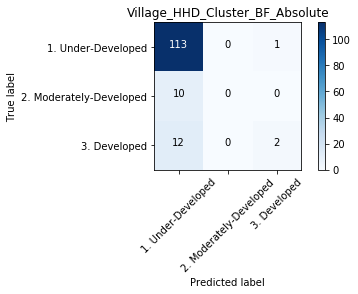

VillageLabels_CHH.csv
accuracy_score 0.3115942028985507
f1_score 0.30335902688241784


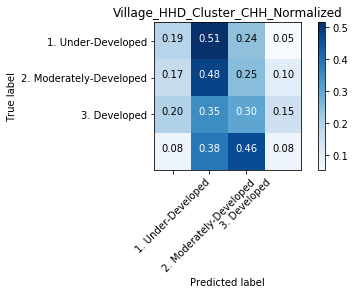

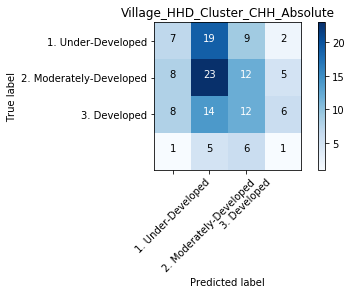

VillageLabels_MSW.csv
accuracy_score 0.6884057971014492
f1_score 0.6687688423958446


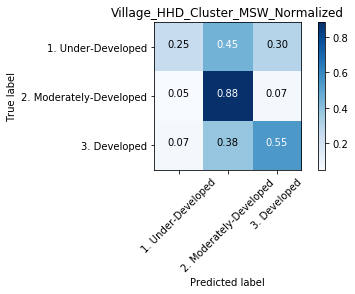

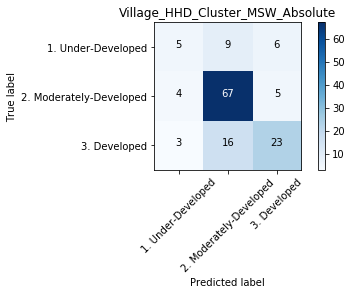

VillageLabels_MSL.csv
accuracy_score 0.5072463768115942
f1_score 0.47837129054520355


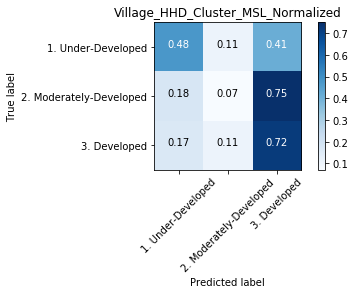

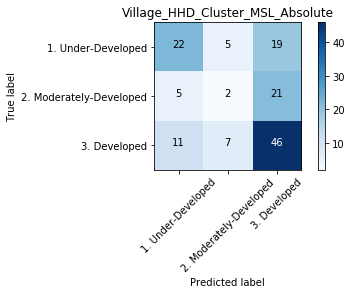

<Figure size 432x288 with 0 Axes>

In [32]:
df1 = pd.read_csv(villageFeaturesCsv)
for z in onlyfiles:
    print(z)
    columnToPredict=predictionColumnDict[z]
    currLabelCsv = labelsFolder +'/'+z
    df = pd.read_csv(currLabelCsv)
    dfMerged=df1.merge(df, left_on='vCode2011', right_on='Town/Village')
    train_features, test_features, train_labels, test_labels = train_test_split(dfMerged[trainCols], 
                                                                                        dfMerged[columnToPredict],
                                                                                        test_size = 0.3,
                                                                                        random_state = int(random.random()))
            
    rf = RandomForestClassifier(n_estimators = 500, random_state = 64, class_weight='balanced')
    rf.fit(train_features, train_labels)
    predictions = rf.predict(test_features)
    print('accuracy_score',accuracy_score(test_labels, predictions))
    print('f1_score',f1_score(test_labels, predictions,average='weighted'))
    cnf_matrix = confusion_matrix(test_labels, predictions)
    class_names=['1. Under-Developed','2. Moderately-Developed','3. Developed']
    if(columnToPredict=='Village_HHD_Cluster_EMP'):
        class_names=['1. Unemployment','2. Agricultural','3. Non Agricultural Employment']
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title=columnToPredict+'_Normalized')
    plt.show()
    #plt.savefig(prediction_label+'_Normalized.jpg')
    plt.clf()
    time.sleep(2)
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,title=columnToPredict+'_Absolute')
    #plt.savefig(prediction_label+'_Absolute.jpg')
    plt.show()
    plt.clf()

In [7]:
df1 = pd.read_csv(villageFeaturesCsv)
df1.shape

(499, 133)

In [8]:
dfMerged=df1.merge(df, left_on='vCode2011', right_on='Town/Village')
dfMerged.shape

(460, 137)

In [12]:
df1.columns

Index(['Unnamed: 0', 'vCode2001', 'vid', 'vCode2011', 'light_0', 'light_1',
       'light_2', 'light_3', 'light_4', 'light_5',
       ...
       'light_119', 'light_120', 'light_121', 'light_122', 'light_123',
       'light_124', 'light_125', 'light_126', 'light_127', 'light_128'],
      dtype='object', length=133)